# Part A
## 1. Euclidian destance function
## 2. Manhattan distance function

note: func calcMinowskiDistance calculates distance differently, based on set p argument.
p=1 - Manhattan distance. p=2 - Euclidian distance.

In [1]:
import numpy as np

#function will take two vectors(arrays) as a parameters and return distance (length of the resulting vector)
#between these two vectors.
def calcMinowskiDistance(x_train, x_test, p=2): 
    assert (type(x_train) is np.ndarray) & (type(x_test) is np.ndarray), 'arguments must be of "ndarray" type'
    total_sum = 0
    v1_len = len(x_train)
    v2_len = len(x_test)
    
    # based on the Minowski Distance equation
    res_arr = np.zeros(shape=(len(x_test), len(x_train)))
#     iterate over testing data points
    for j in range(len(x_test)):
        diff_arr = np.array([])
#         iterate over trained data points
        for i in range(len(x_train)):
            assert len(x_train[i]) == len(x_test[j]), 'dimensionality of the data must be equals in vectors'
            pre_res = 0
            total_sum = 0
            for k in range(len(x_train[i])):
#                 print('x_train = %d - x_test = %d' % (x_train[i,k], x_test[j,k]))
                if (p == 2):
                    sq_dif_vec = np.power(x_train[i,k] - x_test[j,k], 2)
                    total_sum = total_sum + sq_dif_vec
                    pre_res = np.sqrt(total_sum)
                elif(p == 1):
                    total_sum += np.abs(x_train[i,k] - x_test[j,k])
                    pre_res = total_sum
            diff_arr = np.array([np.append(diff_arr, pre_res)])
        
        res_arr[j] = diff_arr
        diff_arr = np.array([])
    return res_arr

# print(calcEclidianDistance(np.array([0,2]),np.array([3,0]),np.array([3,2])))

# tests
# 1. Should be 2
# print(calcEclidianDistance(np.array([2,4]), np.array([0,4])))
# 2. 'arguments must be of "ndarry" type' will be thrown
# print(calcEclidianDistance(1, 42))

## 3. Accuracy and Generalization error

In [2]:
def calcAccuracyAndGenErr(actual_data, predicted_data):
    assert (type(actual_data) is np.ndarray) & (type(predicted_data) is np.ndarray), 'arguments must be of "ndarray" type'
    num_corr_pred = 0
    total_num_rows = len(actual_data)
    
#   check for the dimensionality. The lengh must be the same based on the assumption that data has been prepared already
    assert len(actual_data) == len(predicted_data), 'the dimensionality of the given vectors must be the same'
    
    for j in range(total_num_rows):
        if (actual_data[j] == predicted_data[j]) :
            num_corr_pred += 1
    return num_corr_pred/total_num_rows, (total_num_rows - num_corr_pred)/total_num_rows

# tests
# 0.8 and 0.2 should be returned
print(calcAccuracyAndGenErr(np.array([1, 1, 1, 1, 0]), np.array([1, 1, 1, 1, 1])))

(0.8, 0.2)


## 5. Confusion Matrix

In [3]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

act_data = np.array([0, 0, 1, 1, 0, 1])
pred_data = np.array([0, 0, 1, 0, 1, 0])

def calcConfustionMatrix(actual_data, predicted_data):
    assert (type(actual_data) is np.ndarray) & (type(predicted_data) is np.ndarray), 'arguments must be of "ndarray" type' 
    tn_count = 0
    fp_count = 0
    tp_count = 0
    fn_count = 0
    total_num_rows = len(actual_data)
    
    for j in range(total_num_rows):
        if (actual_data[j] != predicted_data[j]):
            if (actual_data[j] == 1):
                fn_count += 1
            else:
                fp_count += 1
        else:
            if (actual_data[j] == 1):
                tp_count += 1
            else:
                tn_count += 1
    return np.array([(tn_count, fp_count), (fn_count, tp_count)])

print(calcConfustionMatrix(act_data, pred_data))

[[2 1]
 [2 1]]


## 4. Precision, recall and F1 functions

In [4]:
def calcPrecision(actual_data, predicted_data):
    results = calcConfustionMatrix(act_data, predicted_data)
    return results[1,1]/(results[1,1] + results[0,1])

def calcRecall(actual_data, predicted_data):
    results = calcConfustionMatrix(act_data, predicted_data)
    return results[1,1]/(results[1,1] + results[1,0])

def calcF1(actual_data, predicted_data):
    results = calcConfustionMatrix(act_data, predicted_data)
    return results[1,1]/(results[1,1] + ((results[1,0] + results[0,1])/2))

# tests
# Precision
# 0.5 should be returned (in comparison to scikit-learn's function 'precision_score')
print(calcPrecision(act_data, pred_data))
# Recall
# 0.3(3) should be returned (in comparison to scikit-learn's function 'recall_score')
print(calcRecall(act_data, pred_data))
# F1 score
# should be returned (in comparison to scikit-learn's function 'f1_score')
print(calcF1(act_data, pred_data))

0.5
0.3333333333333333
0.4


## 6. ROC

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def roc_curve_vals(actual_data, prediction_data):
    conf_mtx = calcConfustionMatrix(actual_data, prediction_data)

# tresholds = 

# print(y_train_pred = cross_val_predict(knn, x_train, y_train, cv=10))



In [6]:
ar1 = np.array([[4,3]])
ar2 = np.array([[1,6]])

res_ar = np.array([[], []])
res_ar = np.concatenate((ar1, ar2))
print(res_ar)

[[4 3]
 [1 6]]


## 9. KNN-Classifier

In [7]:
import collections
class KnnClassifier:

    def __init__(self, distance_type=2):
        self.distance_type = distance_type
        return 

    def fit(self, X, Y, n_neighbors=2, weights='uniform', **kwargs):
        self.X = X
        self.Y = Y
        self.n_neighbors = n_neighbors
        self.weights = weights

    def _define_cls_by_neighbors(self, dif_distances, neighbors):
        zero_cls_count = 0
        one_cls_count = 0
#       count closest neighbors
        for diff, classes in dif_distances.items():
            for r in range(len(classes)):
                if (self.weights == 'uniform'):
                    if (classes[r] == 0):
                        zero_cls_count += 1
                    else:
                        one_cls_count += 1
                elif (self.weights == 'distance'):
                    if (classes[r] == 0):
                        zero_cls_count += 1/diff
                    else:
                        one_cls_count += 1/diff
                if (zero_cls_count + one_cls_count == neighbors):
                    break
            if (zero_cls_count + one_cls_count == neighbors):
                break
        if zero_cls_count > one_cls_count:
            return 0
        else:
            return 1
        
    def predict(self, X): 
        result = np.array([], dtype=np.int64)  
        diffs = calcMinowskiDistance(self.X, X, p=self.distance_type)
        for i in range(len(diffs)):
            dif_distances = {}
            for j in range(len(diffs[i])):
                if (diffs[i][j] in dif_distances):
                    dif_distances[diffs[i][j]].append(self.Y[j])
                else:
                    dif_distances[diffs[i][j]] = [self.Y[j]]
            sorted_dif_distances = collections.OrderedDict(sorted(dif_distances.items()))
            result = np.append(result, 
                               self._define_cls_by_neighbors(sorted_dif_distances, self.n_neighbors))
        return result
    
# knn = KnnClassifier()

# x = np.array([(1,45),(2,73),(3,44),(1,41),(5,39),(0,33)])
# y = np.array([1,1,0,0,1,1])

# knn.fit(x, y, n_neighbors=3, weights='distance')

# trg_arr = np.array([(3,37),(2,51),(4,41),(2,38),(1,29),(0,39)])
# res = knn.predict(trg_arr)
# print(res)


# from sklearn.neighbors import KNeighborsClassifier

# knn_orig = KNeighborsClassifier(n_neighbors=3, weights='distance', p=2)
# knn_orig.fit(x, y)

# res_1 = knn_orig.predict(trg_arr)

# print(res_1)

[1 1 1 1 1 0]
[1 0 0 1 1 0]


# Part B. Data processing
## 10. Read the wine dataset

In [8]:
import pandas as pd

df = pd.read_csv('winequality-white.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

## 11. Binirize 'quality' column

In [9]:
def binarizeNumericValues(dataframe, boundary_value):
    rng = range(dataframe.shape[0])
    tmp_df = pd.DataFrame(index=rng, columns=['quality'])
    for i in rng:
        if dataframe[i] <= boundary_value:
            tmp_df['quality'][i] = 0
        else:
            tmp_df['quality'][i] = 1
    return tmp_df.astype(int)

df['quality'] = binarizeNumericValues(df['quality'], 5)

df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        1  
1      9.5        1  
2     10.1        1  
3      9.9        1  
4      9.9        1

## 12. Get overview of the features

In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.665169  
std       0.151001     0.114126     1.230621     0.471979  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     1.000000  
75%       3.280000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

## 13. Shuffle the data

In [11]:
df = df.sample(frac=1)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4464            6.6              0.26         0.56            15.4      0.053   
1544            8.9              0.13         0.49             1.0      0.028   
4786            4.4              0.32         0.39             4.3      0.030   
194             6.4              0.29         0.44             3.6      0.200   
4043            7.4              0.16         0.27            15.5      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4464                 32.0                 141.0  0.99810  3.11       0.49   
1544                  6.0                  24.0  0.99260  2.91       0.32   
4786                 31.0                 127.0  0.98904  3.46       0.36   
194                  75.0                 181.0  0.99420  3.02       0.41   
4043                 25.0                 135.0  0.99840  2.90       0.43   

      alcohol  quality  
4464      9.3        0  
1544      9.9        0  
4786     12.8        1  
194       9.1        0  
4043      8.7        1

## 14. Generate pair plots

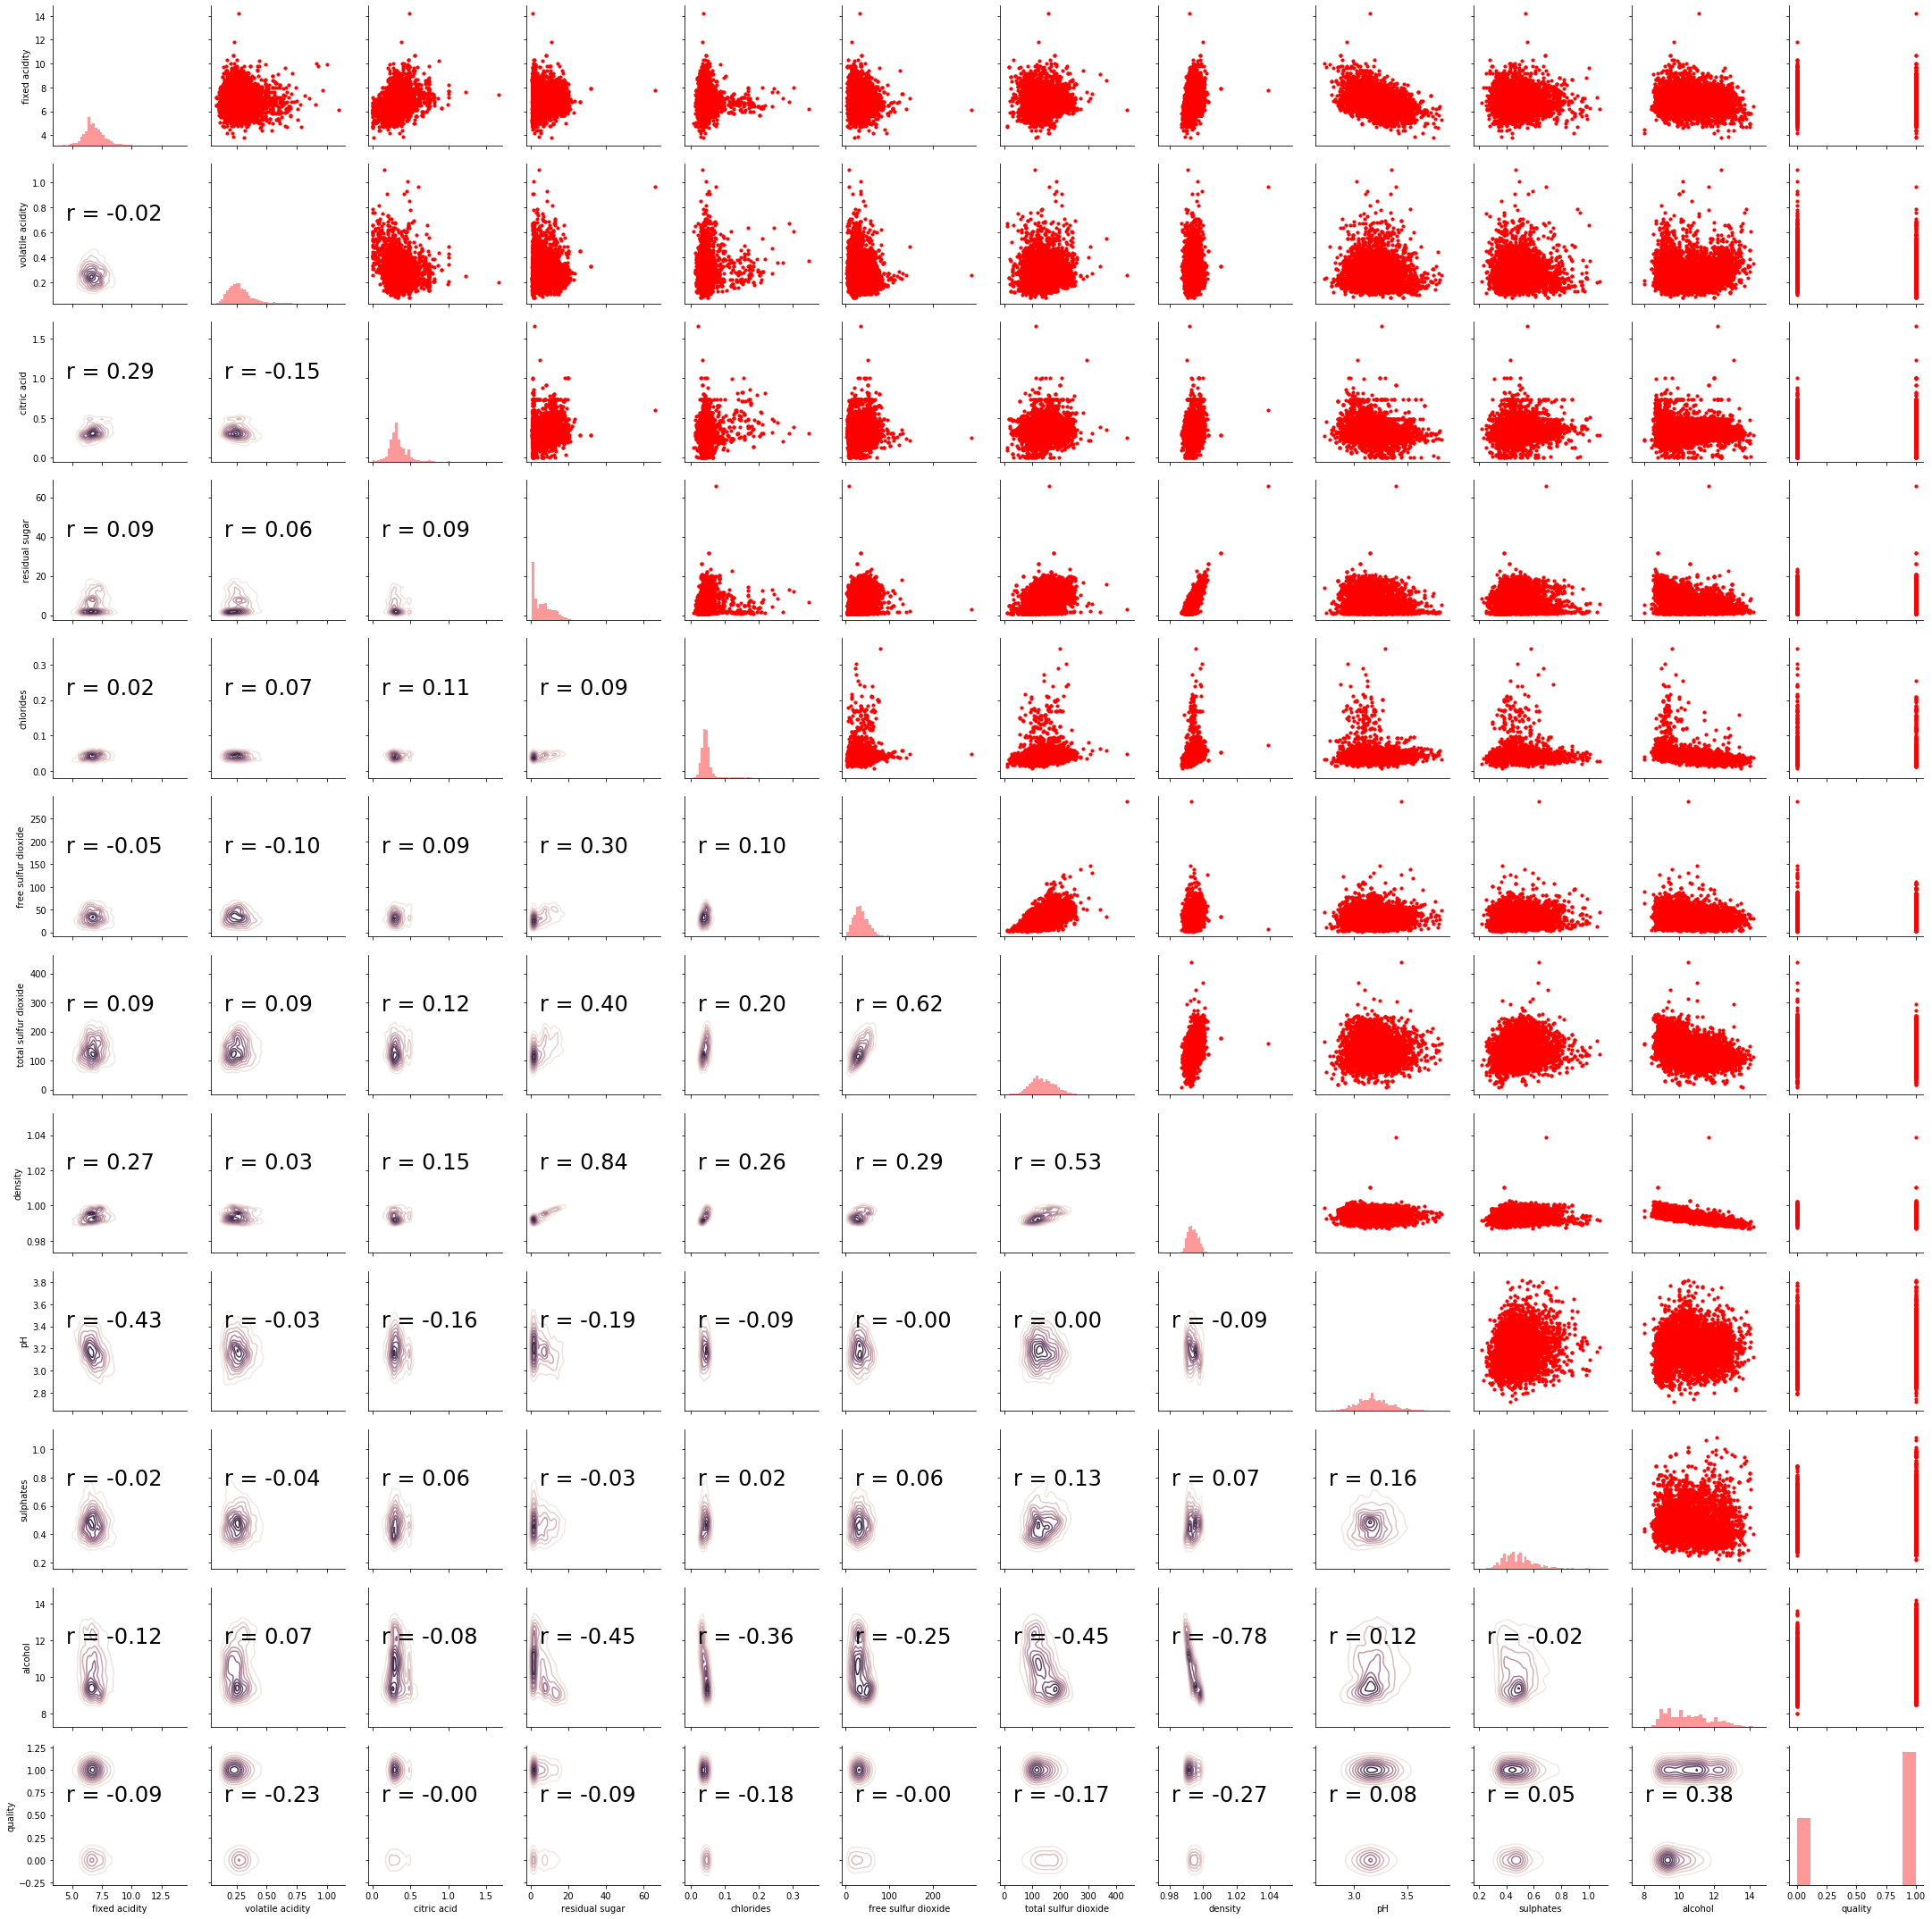

In [12]:
import seaborn as sns
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

g = sns.PairGrid(df)
g.map_upper(plt.scatter, s=10, color = 'red')
g.map_diag(sns.distplot, kde=False, color = 'red')
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

## 15. Drop redundant features

In [13]:
df = df.drop(columns = ['pH', 'sulphates', 'free sulfur dioxide', 'residual sugar',
                        'fixed acidity', 'total sulfur dioxide', 'density', 'chlorides'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4898 entries, 4464 to 168
Data columns (total 4 columns):
volatile acidity    4898 non-null float64
citric acid         4898 non-null float64
alcohol             4898 non-null float64
quality             4898 non-null int64
dtypes: float64(3), int64(1)
memory usage: 351.3 KB


## 16. Splitter function

In [14]:
def partition(x, y, t):
    assert (type(x) is np.ndarray) & (type(y) is np.ndarray), 'arrays must be of type ndarray'
    assert (t > 0) & (t < 1), 't must be bewteen 0 and 1, but got %d' % t
    x_len = len(x)
    assert (x_len == len(y)), 'feature marix must be the same lengh as target vector'
    train_len = int(round(x_len * (1-t)))
    test_len = int(round(x_len * t))
    assert (train_len + test_len == x_len), 'something went wrong. The given data set is split incorrectly.'
    x_train = np.array(x[:train_len,])
    y_train = np.array(y[:train_len])
    x_test = np.array(x[train_len:,])
    y_test = np.array(y[train_len:])
    return x_train, x_test, y_train, y_test

# data_set = np.random.random((5,5))
# trg_v = np.array([1, 1, 0, 1, 0])
# print(partition(data_set,trg_v, 0.2))

## 17. Run KNN-Classifier

In [15]:
knn = KnnClassifier()

x = df.drop(columns = ['quality']).values
y = df['quality'].values

x_train, x_test, y_train, y_test = partition(x, y, 0.2)

knn.fit(x_train, y_train, n_neighbors=5)
y_pred = knn.predict(x_test)
print(y_pred)

[1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 1 1 

### 18. a) Evaluate results using accuracy and F1 score

In [16]:
print('Accuracy: % 1.5f' % calcAccuracyAndGenErr(y_test, y_pred)[0])
print('F1 score: % 1.5f' % calcF1(y_test, y_pred))
print(calcConfustionMatrix(y_test, y_pred))

Accuracy:  0.74388
F1 score:  0.57143
[[180 153]
 [ 98 549]]


### 18. b) Standartize features

In [17]:
def standartize(x):
    res = np.empty([len(x),1])
    for i in range(x.shape[1]):
        feature = x[:,i]
#         print("extracted: \n", feature)
        m = np.mean(feature)
        std = np.std(feature)
        tmp_feat = np.zeros(feature.shape)
        for j in range(len(feature)):
            tmp_feat[j] = (feature[j] - m)/std
#         print("\nstandartized feature: \n", tmp_feat)
        res = np.insert(res, i, tmp_feat, axis=1)
    res = np.delete(res, res.shape[1]-1, 1)
    return res

print(x_train)
print(standartize(x_train))

[[ 0.26  0.56  9.3 ]
 [ 0.13  0.49  9.9 ]
 [ 0.32  0.39 12.8 ]
 ...
 [ 0.35  0.35  9.8 ]
 [ 0.25  0.27  9.9 ]
 [ 0.22  0.42  8.6 ]]
[[-0.18250329  1.86360172 -0.99189105]
 [-1.45771043  1.2857025  -0.50633462]
 [ 0.40605386  0.46013218  1.84052148]
 ...
 [ 0.70033243  0.12990406 -0.58726069]
 [-0.28059615 -0.53055219 -0.50633462]
 [-0.57487472  0.70780328 -1.55837356]]


### 18. c) Re-run KNN-Classifier with standartized data. Compare its accuracy and F1 with a)

In [20]:
x_train_std = standartize(x_train)

knn = KnnClassifier()
knn.fit(x_train_std, y_train, n_neighbors=5)
y_pred_std = knn.predict(x_test)

print('Accuracy: % 1.5f' % calcAccuracyAndGenErr(y_test, y_pred_std)[0])
print('F1 score: % 1.5f' % calcF1(y_test, y_pred_std))

Accuracy:  0.66020
F1 score:  0.66667


### 18. d) Do we need to use standartized data?

### 18. e) Inverse distance weighting report

# Part C. Model Evaluation
## 18. Evaluation of an estimator performance via CV

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

def _s_partition(x, s):
    part_len = len(x)/s
    res = []
    count = 0
    border_values = np.linspace(0, x.shape[0], s+1, dtype=int)
    for j in range(len(border_values)-1):
        res.append(x[border_values[j]:border_values[j+1]])
    return np.asarray(res)

def flatten_arr_x(array):
    new_ar = np.zeros((1,array[0].shape[1]))
    for i in range(len(array)):  
        new_ar = np.vstack((new_ar, array[i]))
    return np.delete(new_ar, 0, axis=0)

def flatten_arr_y(array):
    new_ar = []
    for i in range(len(array)): 
        new_ar.extend(array[i].tolist())
    return np.asarray(new_ar)

def s_fold(folds, data, labels, model, model_args, error_function='f1'):
    folded_data = _s_partition(data, folds)
    folded_labels = _s_partition(labels, folds)
    pred_y = []
    errors = []
    
    for i in range(folds):
        training_data = np.delete(folded_data, i, axis=0)
        training_labels = np.delete(folded_labels, i, axis=0)
        model.fit(flatten_arr_x(training_data), flatten_arr_y(training_labels),  n_neighbors=model_args['n_neighbors'], weights=model_args['weights'])
        for j in range(folds):    
            if (i == j):
                predictions = model.predict(folded_data[i])
                pred_y.append(predictions)
        if (error_function == 'accuracy'):
            errors.append(calcAccuracyAndGenErr(folded_labels[i], predictions))
        elif (error_function == 'precision'):
            errors.append(calcPrecision(folded_labels[i], predictions))
        elif (error_function == 'f1'):
            errors.append(calcF1(folded_labels[i], predictions))
        elif (error_function == 'recall'):
            errors.append(calcRecall(folded_labels[i], predictions))
    avg_error = np.average(errors)
    return {'expected_labels': folded_labels, 'predicted_labels': np.asarray(pred_y), 'average_error': avg_error}

# print(s_fold(10, x_train, y_train, KnnClassifier(), {'n_neighbors': 5, 'weights': 'unifrom'}))

## 19. Find the best set of hyperparameters

In [45]:
n_neibghors = [1, 5, 9, 11]
# 1 stands for Manhattan, 2 - for Euclidian
distances = [1, 2]
weights = ['uniform', 'distance']

res = []
hyperparams = []
best_params = []
for k in n_neibghors:
    for d in distances:
        for w in weights:
            print('hyperparams: k=%d, distance=%s, weight=%s' % (k, d, w))
            eval_res = s_fold(10, x_train, y_train, KnnClassifier(d), {'n_neighbors': k, 'weights': w})
            res.append(eval_res)
            hyperparams.append({'n_neighbors': k, 'weights': w, 'distance': d})
            best_params.append(eval_res['average_error'])

inx_best_hyp_param = best_params.index(max(best_params))
print(hyperparams[inx_best_hyp_param])
print('f1 score: %f1.5' % res[inx_best_hyp_param]['average_error'])
print(res)

{'n_neighbors': 1, 'weights': 'distance', 'distance': 1}
f1 score: 0.6404761.5
[{'expected_labels': array([array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1

## 20. Evaluate the model

In [47]:
print('precision: %1.5f'  % calcPrecision(y_test, y_pred))
print('recall: %1.5f'  % calcRecall(y_test, y_pred))
print('f1 score: %1.5f'  % calcF1(y_test, y_pred))
print('confusioin matrix: \n', calcConfustionMatrix(y_test, y_pred))
print('accuracy: %1.5f'  % calcAccuracyAndGenErr(y_test, y_pred)[0])

precision: 0.50000
recall: 0.66667
f1 score: 0.57143
confusioin matrix: 
 [[180 153]
 [ 98 549]]
accuracy: 0.74388


## 21. Generate ROC curve

## 22. Compute the AUC score

## 23. Generate the precision-recall curve

## 24. Calculate confidence interval